In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None)

In [3]:
print 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print 
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

print (train_set.info())
print (test_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns

In [6]:
train_set.replace(' ?', np.nan).dropna().shape 

(30162, 15)

In [7]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [8]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [9]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [11]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [14]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education_num   45222 non-null  int64 
 5   marital_status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital_gain    45222 non-null  int64 
 11  capital_loss    45222 non-null  int64 
 12  hours_per_week  45222 non-null  int64 
 13  native_country  45222 non-null  object
 14  wage_class      45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [15]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [16]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int8 
 2   fnlwgt          45222 non-null  int64
 3   education       45222 non-null  int8 
 4   education_num   45222 non-null  int64
 5   marital_status  45222 non-null  int8 
 6   occupation      45222 non-null  int8 
 7   relationship    45222 non-null  int8 
 8   race            45222 non-null  int8 
 9   sex             45222 non-null  int8 
 10  capital_gain    45222 non-null  int64
 11  capital_loss    45222 non-null  int64
 12  hours_per_week  45222 non-null  int64
 13  native_country  45222 non-null  int8 
 14  wage_class      45222 non-null  int8 
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [17]:
combined_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,38,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,38,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,38,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [18]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [19]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [20]:
!pip install xgboost

In [21]:
pip install xgboost==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost as xgb

In [23]:
!pip install sklearn
import sklearn

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [26]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=0,
                                     subsample=0.8, tree_method

In [27]:
optimized_GBM.cv_results_

{'mean_fit_time': array([22.11957211, 22.84007106, 23.89084253, 37.70659704, 38.76638217,
        40.99267464, 66.7693903 , 71.55591903, 62.53582478]),
 'std_fit_time': array([0.06212091, 0.92891096, 0.08157838, 1.02035646, 1.20135752,
        0.28022277, 5.95398022, 1.24907168, 0.20797187]),
 'mean_score_time': array([0.33398905, 0.34025488, 0.34329305, 1.06033368, 0.99167089,
        0.99828591, 2.52682056, 2.51418962, 1.61025977]),
 'std_score_time': array([0.01362968, 0.01600795, 0.00951088, 0.1753507 , 0.14229168,
        0.04784047, 0.74134119, 0.47742493, 0.13104058]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_val

In [28]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 5}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)


In [29]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=0,
                                     subsample=None, tree_method=Non

In [30]:
optimized_GBM.cv_results_

{'mean_fit_time': array([25.92519212, 24.78568568, 23.84491706, 27.78778186, 26.94932156,
        23.44144025]),
 'std_fit_time': array([0.19617231, 0.37844627, 0.26411653, 0.59487266, 1.24452125,
        0.13596563]),
 'mean_score_time': array([0.29880381, 0.3354722 , 0.34419184, 0.36121416, 0.33023148,
        0.29792037]),
 'std_score_time': array([0.00545524, 0.0247126 , 0.01528539, 0.00903603, 0.04993132,
        0.02230349]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'subsample': 0.7},
  {'learning_rate': 0.1, 'subsample': 0.8},
  {'learning_rate': 0.1, 'subsample': 0.9},
  {'learning_rate': 0.01, 'subsample': 0.7},


In [31]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [32]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.9, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':5} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], early_stopping_rounds = 100) 

In [33]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
320,0.122066,0.001300,0.131026,0.004816
321,0.121958,0.001261,0.130893,0.004733
322,0.122016,0.001261,0.130760,0.004786
323,0.122008,0.001259,0.130628,0.004880
324,0.121925,0.001216,0.130528,0.004743


In [34]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.9, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':5} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 324)

In [35]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.2)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

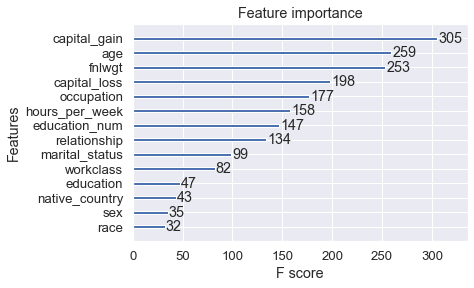

In [36]:
xgb.plot_importance(final_gb)

In [37]:
importances = final_gb.get_fscore()
importances

{'relationship': 134,
 'capital_gain': 305,
 'capital_loss': 198,
 'education_num': 147,
 'hours_per_week': 158,
 'age': 259,
 'marital_status': 99,
 'occupation': 177,
 'sex': 35,
 'education': 47,
 'workclass': 82,
 'fnlwgt': 253,
 'race': 32,
 'native_country': 43}

<AxesSubplot:ylabel='Feature'>

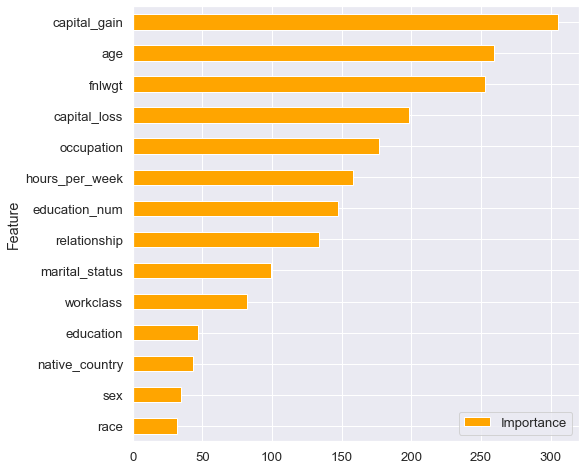

In [38]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [39]:
testdmat = xgb.DMatrix(final_test)

In [40]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.00339798, 0.23794386, 0.32312882, ..., 0.83357435, 0.1307034 ,
       0.7927765 ], dtype=float32)

In [41]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [42]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8686586985391767, 0.13134130146082335)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_jobs=4)
rf.fit(final_train, y_train)
Y_pred = rf.predict(final_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
 print (classification_report(y_test, Y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8818    0.9266    0.9036     11360
           1     0.7329    0.6186    0.6710      3700

    accuracy                         0.8509     15060
   macro avg     0.8074    0.7726    0.7873     15060
weighted avg     0.8452    0.8509    0.8465     15060



In [47]:
from sklearn.metrics import RocCurveDisplay

In [48]:
 print (classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8909    0.9411    0.9153     11360
           1     0.7814    0.6462    0.7074      3700

    accuracy                         0.8687     15060
   macro avg     0.8361    0.7937    0.8114     15060
weighted avg     0.8640    0.8687    0.8642     15060



In [49]:
accuracy_score(Y_pred, y_test)

0.850929614873838

In [50]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [51]:
import scikitplot as skplt

In [52]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

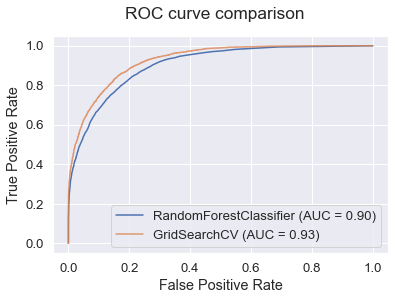

In [53]:
rfc_disp = plot_roc_curve(rf, final_test, y_test)
rfc_disp.figure_.suptitle("ROC curve comparison")
xgb_disp = plot_roc_curve(optimized_GBM, final_test, y_test, ax=rfc_disp.ax_, alpha=0.8)
xgb_disp.figure_.suptitle("ROC curve comparison")
plt.show()